In [2]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()
uploaded2 = files.upload()


Saving hospitalizaciones_train.csv to hospitalizaciones_train.csv


Saving hospitalizaciones_test.csv to hospitalizaciones_test.csv


In [3]:
# Load the datasets
train = pd.read_csv(io.BytesIO(uploaded['hospitalizaciones_train.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['hospitalizaciones_test.csv']))

In [4]:
# We leave the names of the columns well. No unnecessary ungrammatical capitalization
train.columns = ['Rooms_available', 'Department', 'Ward_facility_code', 'Doctor_name', 'Staff_available', 'PatientID', 'Age', 'Gender', 'Type_of_admission', 'Severity_of_illness', 'Health_conditions', 'Visitors_with_patient', 'Insurance', 'Admission_deposit', 'Stay_in_days']
test.columns = ['Rooms_available', 'Department', 'Ward_facility_code', 'Doctor_name', 'Staff_available', 'PatientID', 'Age', 'Gender', 'Type_of_admission', 'Severity_of_illness', 'Health_conditions', 'Visitors_with_patient', 'Insurance', 'Admission_deposit']

In [5]:
train.columns

Index(['Rooms_available', 'Department', 'Ward_facility_code', 'Doctor_name',
       'Staff_available', 'PatientID', 'Age', 'Gender', 'Type_of_admission',
       'Severity_of_illness', 'Health_conditions', 'Visitors_with_patient',
       'Insurance', 'Admission_deposit', 'Stay_in_days'],
      dtype='object')

In [6]:
# We added a categorical column distinguishing whether your stay was prolonged or not, in binary
stay = []
for row in train['Stay_in_days']:
    if row <= 8 :    stay.append(0)
    else:
        stay.append(1)

train['prolonged_stay'] = stay

In [7]:
# Encode categorical variables
train = pd.get_dummies(train, columns=['Department', 'Gender', 'Type_of_admission', 'Severity_of_illness', 'Health_conditions', 'Age', 'Insurance'])
test = pd.get_dummies(test, columns=['Department', 'Gender', 'Type_of_admission', 'Severity_of_illness', 'Health_conditions', 'Age', 'Insurance'])

In [8]:
train.columns

Index(['Rooms_available', 'Ward_facility_code', 'Doctor_name',
       'Staff_available', 'PatientID', 'Visitors_with_patient',
       'Admission_deposit', 'Stay_in_days', 'prolonged_stay',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Type_of_admission_Emergency', 'Type_of_admission_Trauma',
       'Type_of_admission_Urgent', 'Severity_of_illness_Extreme',
       'Severity_of_illness_Minor', 'Severity_of_illness_Moderate',
       'Health_conditions_Asthama', 'Health_conditions_Diabetes',
       'Health_conditions_Heart disease',
       'Health_conditions_High Blood Pressure', 'Health_conditions_None',
       'Health_conditions_Other', 'Age_0-10', 'Age_11-20', 'Age_21-30',
       'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80',
       'Age_81-90', 'Age_91-100', 'Insurance_No', 'Insurance_Yes'],
      dtype='obj

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Ward_facility_code', 'Doctor_name', 'Stay_in_days', 'prolonged_stay'], axis=1),
train['prolonged_stay'], test_size=0.2, random_state=42)

In [10]:
import time

start_time = time.time()

# Train the model
rf = RandomForestClassifier(n_estimators=2500, max_depth=25, random_state=42)
rf.fit(X_train, y_train)

end_time = time.time()

print("Time taken to fit the Random Forest model:", end_time - start_time, "seconds")

Time taken to fit the Random Forest model: 1552.4054703712463 seconds


In [11]:
# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7600121951219512
Precision: 0.7843158621190658
Recall: 0.8469669928808174
F1 score: 0.814438336272171


In [12]:
# Drop irrelevant columns
test.drop(['Ward_facility_code', 'Doctor_name'], axis=1, inplace=True)

In [13]:
# Make predictions using the trained model on a new dataset and new patients
predictions_test = rf.predict(test)

Feature ranking:
1. Admission_deposit: 0.18347423239377375
2. PatientID: 0.12055975595551965
3. Age_31-40: 0.07364936524299621
4. Rooms_available: 0.07349175325848611
5. Department_radiotherapy: 0.061378396407834705
6. Staff_available: 0.06101589795581822
7. Age_41-50: 0.05596419706659413
8. Department_anesthesia: 0.05476845823726365
9. Visitors_with_patient: 0.04581748509475244
10. Department_gynecology: 0.031472098166926726
11. Age_61-70: 0.028545593216138358
12. Department_TB & Chest disease: 0.022364127240169836
13. Age_51-60: 0.022114322600877697
14. Age_21-30: 0.022019987080731884
15. Age_71-80: 0.021613677998639527
16. Gender_Female: 0.020802195250628295
17. Gender_Male: 0.01369307734373755
18. Age_81-90: 0.01027063012309381
19. Type_of_admission_Trauma: 0.006213934017259223
20. Severity_of_illness_Moderate: 0.005835415626190858
21. Type_of_admission_Emergency: 0.005595378806750314
22. Severity_of_illness_Minor: 0.004886517447201377
23. Insurance_Yes: 0.004847102549191564
24. In

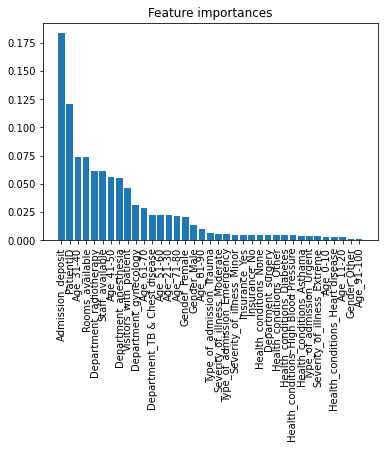

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and feature names
importances = rf.feature_importances_
feature_names = X_train.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]}")

# Plot the feature importances
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature importances")
plt.show()